In [1]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop




# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [ ]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [ ]:
#y.shape

In [ ]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [ ]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [ ]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [3]:
# #y
y_list = []
for image in sorted(os.listdir('Data/y_variables/Unruled')):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape,1)
    y_list.append(y_image)
                  
y = np.array(y_list)  
y.shape

(669, 500, 400, 1)

In [ ]:
#y ONLY 10 IMAGES
# y_list = []
# for image in sorted(os.listdir('Data/y_variables/Unruled')):
#     file='Data/y_variables/Unruled/'+ str(image)
#     y_image = np.array(Image.open(file))
#     y_image = y_image.reshape(*y_image.shape, 1)
#     y_list.append(y_image)
#     if len(y_list) == 10:
#         break

# plt.imshow(y_list[0].reshape(500,400))                
# y = np.array(y_list)  
# y.shape

In [4]:
# #X

X_list = []
for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape,1)
    X_list.append(X_image)
    
X = np.array(X_list)
X.shape

(669, 500, 400, 1)

In [ ]:
#X FIRST 10 IMAGES

# X_list = []
# for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
#     file = 'Data/X_variables/computer_generated_lines/'+str(image)
#     X_image = np.array(Image.open(file))
#     X_image = X_image.reshape(*X_image.shape, 1)
#     X_list.append(X_image)
#     if len(X_list) == 10:
#         break


# plt.imshow(X_list[0].reshape(500,400))    
# X = np.array(X_list)
# X.shape

In [ ]:
X.shape, y.shape

In [ ]:
plt.imshow(y[1,:,:,:].reshape(500,400))

In [ ]:
tf.__version__

# 3 SELECTIONAL AUTOENCODER model
Selectional Auto-Encoder (SAE)
The hierarchy of layers of our SAE consists of a series of convolutional plus pooling layers, until an intermediate layer in which meaningful representations of the input are attained. As these layers are applied, filters are able to relate parts of the image that were initially far apart. It then follows a series of convolutional plus upsampling layers that reconstruct the image up to the same 200 input size. The last layer consists of a set of neurons with sigmoid activation that predict a value in the range of [0, 1], depending on the selectional level for the corresponding input feature. 

200 epochs maximum
patience = 5
used grid search to tune hyper parameters?
batch size = 8
results + F measure (F score?)



In [ ]:
# input_img = image_to_predict.reshape(*image_to_predict.shape,1)# adapt this if using `channels_first` image data format
# input_img.shape


In [ ]:
#SET UP TENSORBOARD



In [68]:
# *SET UP TENSORBOARD**

#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)
#model_cp = ModelCheckpoint(filepath=checkpoint_filepath)

#METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='ROC', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
#METRICS = [ metrics.Accuracy(name='ACCURACY'),
          # metrics.AUC(name='AUC', curve='ROC', multi_label=False)]


#METRICS = [ metrics.Accuracy(name='ACCURACY')]



#model.compile(loss = 'mse', optimizer = 'adam', metrics=METRICS)

# ***** DONT FORGET TO CHANGE LOG_DIR and FILE PATH before running next model ************


#updated tensorboard
checkpoint_filepath = './tmp/model_E/checkpoint'
tensorboard = TensorBoard(log_dir="./logs/model_E",
                          
                        histogram_freq=2,
                        write_graph=True,
                        write_images=True,
                        update_freq="epoch",
                        profile_batch=2,
                        embeddings_freq=0,
                        embeddings_metadata=None)

early_stopping = EarlyStopping(monitor='loss', restore_best_weights=True)
#early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath, monitor = 'loss', save_best_only=True)

#early_stopping = EarlyStopping(monitor='loss',patience=10)

# Model 2.A Research paper FULL version

In [ ]:
# MODEL A. straight from the keras website (used to model the below one) **DOESNT WORK**

 
# input_img = Input(shape=(500,400,1))
# x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)
# autoencoder.summary()
#autoencoder.compile(optimizer='adam', loss='mse', metrics=METRICS)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') #original compile from tensorflow


# Model 2.B Sparse

In [6]:
#MODEL B. Bare bones *WORKS*BUT*SIMPLE


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Dense(128)(x) 

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
x= Conv2DTranspose(32,(3,3), activation='relu')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_B = Model(input_img, decoded)
autoencoder_B.summary()
autoencoder_B.compile(optimizer='adam', loss='mse', metrics='accuracy')


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 498, 398, 8)       2312      
_________________________________________________________________
dense (Dense)                (None, 498, 398, 128)     1152      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 500, 400, 32)      36896     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 500, 400, 1)       289       
Total params: 40,969
Trainable params: 40,969
Non-trainable params: 0
__________________________________________________

In [7]:
#FIT MODEL-

#history_B = autoencoder_B.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2)

history_B = autoencoder_B.fit(x=X, y=y, batch_size=15, epochs = 300, verbose=1, callbacks=[tensorboard, model_cp], validation_split=0.2)


Epoch 1/300
 1/36 [..............................] - ETA: 0s - loss: 51729.8906 - accuracy: 3.6667e-06WARNING:tensorflow:From /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
36/36 [==============================] - ETA: 0s - loss: 7869.0972 - accuracy: 4.6542e-06WARNING:tensorflow:From /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu/lib/python3.7/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as update

36/36 [==============================] - 5s 129ms/step - loss: 18.7401 - accuracy: 6.5421e-06 - val_loss: 19.5522 - val_accuracy: 1.6940e-05
Epoch 27/300
36/36 [==============================] - 5s 133ms/step - loss: 18.1371 - accuracy: 6.3458e-06 - val_loss: 19.1326 - val_accuracy: 1.7201e-05
Epoch 28/300
36/36 [==============================] - 5s 129ms/step - loss: 17.8674 - accuracy: 6.4299e-06 - val_loss: 19.3234 - val_accuracy: 1.7649e-05
Epoch 29/300
36/36 [==============================] - 4s 106ms/step - loss: 18.2267 - accuracy: 6.4393e-06 - val_loss: 19.0749 - val_accuracy: 1.8470e-05
Epoch 30/300
36/36 [==============================] - 4s 106ms/step - loss: 20.2493 - accuracy: 6.4579e-06 - val_loss: 18.3010 - val_accuracy: 1.9142e-05
Epoch 31/300
36/36 [==============================] - 5s 130ms/step - loss: 17.5019 - accuracy: 6.3271e-06 - val_loss: 18.8659 - val_accuracy: 2.0336e-05
Epoch 32/300
36/36 [==============================] - 4s 105ms/step - loss: 24.5804 - acc

36/36 [==============================] - 4s 106ms/step - loss: 14.9494 - accuracy: 7.1776e-06 - val_loss: 14.3582 - val_accuracy: 1.8060e-05
Epoch 68/300
36/36 [==============================] - 4s 106ms/step - loss: 13.9882 - accuracy: 8.1963e-06 - val_loss: 15.6311 - val_accuracy: 1.9851e-05
Epoch 69/300
36/36 [==============================] - 4s 106ms/step - loss: 17.4050 - accuracy: 8.1495e-06 - val_loss: 14.8162 - val_accuracy: 1.9888e-05
Epoch 70/300
36/36 [==============================] - 4s 106ms/step - loss: 15.1900 - accuracy: 8.8972e-06 - val_loss: 33.9292 - val_accuracy: 2.2575e-05
Epoch 71/300
36/36 [==============================] - 4s 106ms/step - loss: 17.3790 - accuracy: 8.4486e-06 - val_loss: 14.5087 - val_accuracy: 1.8694e-05
Epoch 72/300
36/36 [==============================] - 4s 106ms/step - loss: 15.6036 - accuracy: 8.2150e-06 - val_loss: 16.5028 - val_accuracy: 2.9627e-05
Epoch 73/300
36/36 [==============================] - 4s 106ms/step - loss: 15.2633 - acc

36/36 [==============================] - 4s 106ms/step - loss: 11.5474 - accuracy: 1.1271e-05 - val_loss: 11.8363 - val_accuracy: 4.3433e-05
Epoch 116/300
36/36 [==============================] - 4s 106ms/step - loss: 13.7185 - accuracy: 1.2729e-05 - val_loss: 28.7167 - val_accuracy: 2.2985e-05
Epoch 117/300
36/36 [==============================] - 4s 106ms/step - loss: 15.0135 - accuracy: 1.3589e-05 - val_loss: 13.0290 - val_accuracy: 3.4179e-05
Epoch 118/300
36/36 [==============================] - 4s 106ms/step - loss: 11.6226 - accuracy: 1.4776e-05 - val_loss: 16.1246 - val_accuracy: 2.5149e-05
Epoch 119/300
36/36 [==============================] - 4s 107ms/step - loss: 13.6786 - accuracy: 1.6121e-05 - val_loss: 13.6661 - val_accuracy: 2.6642e-05
Epoch 120/300
36/36 [==============================] - 4s 106ms/step - loss: 13.9483 - accuracy: 1.2776e-05 - val_loss: 14.6060 - val_accuracy: 3.3134e-05
Epoch 121/300
36/36 [==============================] - 4s 106ms/step - loss: 11.3826

Epoch 164/300
36/36 [==============================] - 4s 106ms/step - loss: 12.6710 - accuracy: 1.9439e-05 - val_loss: 11.0764 - val_accuracy: 3.7649e-05
Epoch 165/300
36/36 [==============================] - 4s 107ms/step - loss: 12.7038 - accuracy: 1.1280e-05 - val_loss: 12.3402 - val_accuracy: 3.4963e-05
Epoch 166/300
36/36 [==============================] - 5s 130ms/step - loss: 10.1377 - accuracy: 1.4000e-05 - val_loss: 10.5899 - val_accuracy: 3.8470e-05
Epoch 167/300
36/36 [==============================] - 5s 134ms/step - loss: 9.6197 - accuracy: 1.5664e-05 - val_loss: 24.7616 - val_accuracy: 3.1754e-05
Epoch 168/300
36/36 [==============================] - 4s 106ms/step - loss: 20.8919 - accuracy: 1.4832e-05 - val_loss: 11.1942 - val_accuracy: 4.5858e-05
Epoch 169/300
36/36 [==============================] - 4s 107ms/step - loss: 9.8593 - accuracy: 1.7168e-05 - val_loss: 10.8910 - val_accuracy: 4.2127e-05
Epoch 170/300
36/36 [==============================] - 4s 106ms/step - l

36/36 [==============================] - 4s 107ms/step - loss: 11.2420 - accuracy: 1.5206e-05 - val_loss: 10.6842 - val_accuracy: 3.4963e-05
Epoch 212/300
36/36 [==============================] - 4s 106ms/step - loss: 11.7717 - accuracy: 1.6028e-05 - val_loss: 21.0784 - val_accuracy: 3.0075e-05
Epoch 213/300
36/36 [==============================] - 4s 106ms/step - loss: 12.4349 - accuracy: 1.8131e-05 - val_loss: 9.9912 - val_accuracy: 3.6493e-05
Epoch 214/300
36/36 [==============================] - 4s 106ms/step - loss: 9.0332 - accuracy: 1.9589e-05 - val_loss: 13.5939 - val_accuracy: 3.1045e-05
Epoch 215/300
36/36 [==============================] - 4s 106ms/step - loss: 9.7661 - accuracy: 1.5065e-05 - val_loss: 10.3504 - val_accuracy: 4.0485e-05
Epoch 216/300
36/36 [==============================] - 4s 106ms/step - loss: 9.6488 - accuracy: 1.3019e-05 - val_loss: 10.0995 - val_accuracy: 5.4888e-05
Epoch 217/300
36/36 [==============================] - 4s 107ms/step - loss: 9.7196 - ac

36/36 [==============================] - 4s 107ms/step - loss: 8.9066 - accuracy: 1.2327e-05 - val_loss: 9.7736 - val_accuracy: 4.0672e-05
Epoch 261/300
36/36 [==============================] - 4s 107ms/step - loss: 11.0995 - accuracy: 1.1850e-05 - val_loss: 14.2037 - val_accuracy: 3.5485e-05
Epoch 262/300
36/36 [==============================] - 4s 106ms/step - loss: 10.0951 - accuracy: 1.1766e-05 - val_loss: 15.8782 - val_accuracy: 4.1082e-05
Epoch 263/300
36/36 [==============================] - 4s 107ms/step - loss: 11.1298 - accuracy: 1.4308e-05 - val_loss: 13.3500 - val_accuracy: 4.2388e-05
Epoch 264/300
36/36 [==============================] - 4s 106ms/step - loss: 10.4853 - accuracy: 2.4065e-05 - val_loss: 11.3427 - val_accuracy: 1.7910e-05
Epoch 265/300
36/36 [==============================] - 4s 106ms/step - loss: 8.9287 - accuracy: 1.1514e-05 - val_loss: 10.8232 - val_accuracy: 3.6642e-05
Epoch 266/300
36/36 [==============================] - 4s 106ms/step - loss: 9.1152 - a

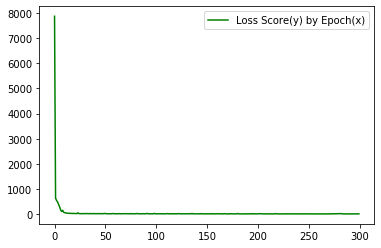

In [8]:
plt.plot(history_B.history['loss'], color='green', label='Loss Score(y) by Epoch(x)')
# , marker ='o', linestyle='dashed',
plt.legend()

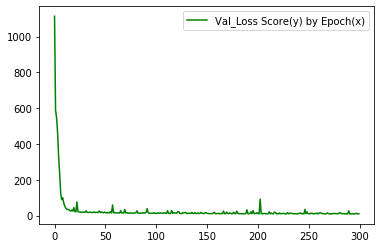

In [14]:
plt.plot(history_B.history['val_loss'], color='green', label='Val_Loss Score(y) by Epoch(x)')
# , marker ='o', linestyle='dashed',
plt.legend()

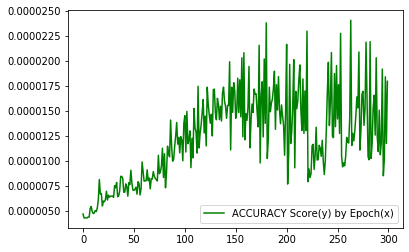

In [10]:
plt.plot(history_B.history['accuracy'],  color='green', label='ACCURACY Score(y) by Epoch(x)')
plt.legend()

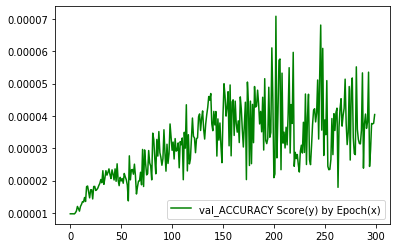

In [15]:
plt.plot(history_B.history['val_accuracy'],  color='green', label='val_ACCURACY Score(y) by Epoch(x)')
plt.legend()

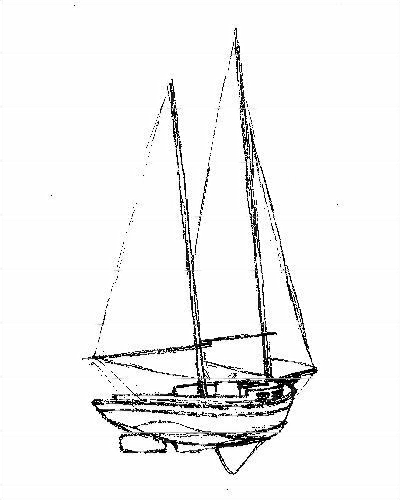

In [11]:
result = autoencoder_B.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

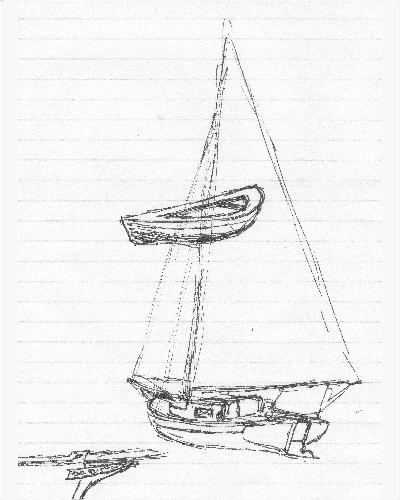

In [33]:
# See how it predicts on unseen image
result = autoencoder_B.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result) 


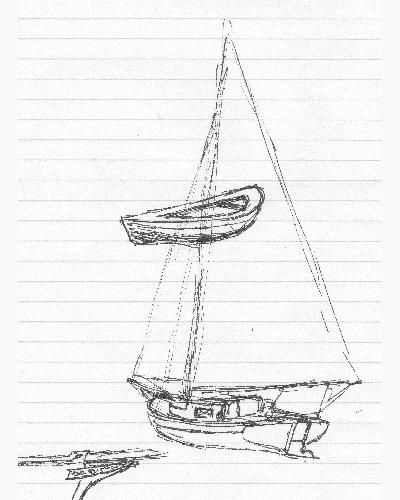

In [34]:
#original
Image.fromarray(image_to_predict)

# Model 2.C Intermediate Model

In [42]:


#MODEL C. Megans


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)


x = Dense(128)(x) #bottleneck

# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu',  padding='same')(x)


# x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32,(3,3), activation='relu', padding='same')(x)

decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_C = Model(input_img, decoded)
autoencoder_C.summary()
autoencoder_C.compile(optimizer='adam', loss='mse', metrics='accuracy')


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 498, 398, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 249, 199, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 249, 199, 16)      4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 123, 98, 8)        1160      
_________________________________________________________________
dense_4 (Dense)              (None, 123, 98, 128)     

In [43]:

# history_C = autoencoder_C.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2 )
history_C = autoencoder_C.fit(x=X, y=y, batch_size=15, epochs = 300, verbose=2, callbacks=[tensorboard, model_cp], validation_split=0.2 )


Epoch 1/300
36/36 - 2s - loss: 12532.3193 - accuracy: 4.4206e-06 - val_loss: 1373.2137 - val_accuracy: 9.7388e-06
Epoch 2/300
36/36 - 2s - loss: 781.4272 - accuracy: 4.2617e-06 - val_loss: 438.7926 - val_accuracy: 9.7388e-06
Epoch 3/300
36/36 - 2s - loss: 309.2917 - accuracy: 4.2617e-06 - val_loss: 253.0529 - val_accuracy: 9.7388e-06
Epoch 4/300
36/36 - 2s - loss: 222.4525 - accuracy: 4.2617e-06 - val_loss: 202.8127 - val_accuracy: 9.7388e-06
Epoch 5/300
36/36 - 2s - loss: 191.3766 - accuracy: 4.2617e-06 - val_loss: 183.4261 - val_accuracy: 9.7388e-06
Epoch 6/300
36/36 - 2s - loss: 179.1265 - accuracy: 4.2617e-06 - val_loss: 175.0509 - val_accuracy: 9.7388e-06
Epoch 7/300
36/36 - 2s - loss: 172.4142 - accuracy: 4.2617e-06 - val_loss: 175.4514 - val_accuracy: 9.7388e-06
Epoch 8/300
36/36 - 2s - loss: 171.3757 - accuracy: 4.2617e-06 - val_loss: 171.6187 - val_accuracy: 9.7388e-06
Epoch 9/300
36/36 - 2s - loss: 166.7987 - accuracy: 4.2617e-06 - val_loss: 163.5915 - val_accuracy: 9.7388e-0

Epoch 73/300
36/36 - 2s - loss: 115.2142 - accuracy: 4.5514e-06 - val_loss: 115.3292 - val_accuracy: 1.0037e-05
Epoch 74/300
36/36 - 2s - loss: 112.8070 - accuracy: 4.7850e-06 - val_loss: 126.9212 - val_accuracy: 9.9254e-06
Epoch 75/300
36/36 - 2s - loss: 118.4420 - accuracy: 4.6168e-06 - val_loss: 115.4979 - val_accuracy: 9.9627e-06
Epoch 76/300
36/36 - 2s - loss: 114.9642 - accuracy: 4.5607e-06 - val_loss: 119.6482 - val_accuracy: 9.9254e-06
Epoch 77/300
36/36 - 2s - loss: 112.1637 - accuracy: 4.6822e-06 - val_loss: 118.5456 - val_accuracy: 9.9627e-06
Epoch 78/300
36/36 - 2s - loss: 117.2173 - accuracy: 4.5047e-06 - val_loss: 128.2117 - val_accuracy: 1.0224e-05
Epoch 79/300
36/36 - 2s - loss: 114.3614 - accuracy: 4.7383e-06 - val_loss: 113.4847 - val_accuracy: 9.9627e-06
Epoch 80/300
36/36 - 2s - loss: 111.8690 - accuracy: 4.7570e-06 - val_loss: 115.8159 - val_accuracy: 1.0000e-05
Epoch 81/300
36/36 - 2s - loss: 119.7326 - accuracy: 4.7009e-06 - val_loss: 127.7816 - val_accuracy: 1.0

Epoch 146/300
36/36 - 2s - loss: 110.0606 - accuracy: 4.9720e-06 - val_loss: 117.7343 - val_accuracy: 1.0299e-05
Epoch 147/300
36/36 - 2s - loss: 1734.1447 - accuracy: 1.2047e-05 - val_loss: 1350.9865 - val_accuracy: 1.1082e-05
Epoch 148/300
36/36 - 2s - loss: 590.3380 - accuracy: 4.9813e-06 - val_loss: 236.1992 - val_accuracy: 1.0187e-05
Epoch 149/300
36/36 - 2s - loss: 191.9714 - accuracy: 4.4486e-06 - val_loss: 173.8260 - val_accuracy: 1.0037e-05
Epoch 150/300
36/36 - 2s - loss: 163.4115 - accuracy: 4.3084e-06 - val_loss: 160.5652 - val_accuracy: 9.9627e-06
Epoch 151/300
36/36 - 2s - loss: 154.6145 - accuracy: 4.3178e-06 - val_loss: 154.0677 - val_accuracy: 9.7761e-06
Epoch 152/300
36/36 - 2s - loss: 149.9915 - accuracy: 4.2991e-06 - val_loss: 150.4200 - val_accuracy: 9.8134e-06
Epoch 153/300
36/36 - 2s - loss: 146.4723 - accuracy: 4.3084e-06 - val_loss: 147.7298 - val_accuracy: 9.8881e-06
Epoch 154/300
36/36 - 2s - loss: 143.4217 - accuracy: 4.2897e-06 - val_loss: 144.6645 - val_ac

Epoch 219/300
36/36 - 2s - loss: 110.3505 - accuracy: 4.8224e-06 - val_loss: 110.0133 - val_accuracy: 1.0858e-05
Epoch 220/300
36/36 - 2s - loss: 110.3686 - accuracy: 4.8131e-06 - val_loss: 105.4839 - val_accuracy: 1.0522e-05
Epoch 221/300
36/36 - 2s - loss: 101.8220 - accuracy: 4.9720e-06 - val_loss: 109.1707 - val_accuracy: 1.0709e-05
Epoch 222/300
36/36 - 2s - loss: 102.5147 - accuracy: 4.9720e-06 - val_loss: 105.5230 - val_accuracy: 1.0522e-05
Epoch 223/300
36/36 - 2s - loss: 107.9536 - accuracy: 4.8037e-06 - val_loss: 123.7795 - val_accuracy: 1.0933e-05
Epoch 224/300
36/36 - 2s - loss: 105.0743 - accuracy: 4.8318e-06 - val_loss: 104.3541 - val_accuracy: 1.0560e-05
Epoch 225/300
36/36 - 2s - loss: 102.0086 - accuracy: 4.9907e-06 - val_loss: 104.8695 - val_accuracy: 1.0560e-05
Epoch 226/300
36/36 - 2s - loss: 101.2697 - accuracy: 4.9626e-06 - val_loss: 104.0558 - val_accuracy: 1.0560e-05
Epoch 227/300
36/36 - 2s - loss: 109.8073 - accuracy: 5.0841e-06 - val_loss: 112.1543 - val_accu

Epoch 292/300
36/36 - 2s - loss: 95.5697 - accuracy: 5.0187e-06 - val_loss: 107.3779 - val_accuracy: 1.0784e-05
Epoch 293/300
36/36 - 2s - loss: 96.4076 - accuracy: 5.1402e-06 - val_loss: 99.7144 - val_accuracy: 1.0709e-05
Epoch 294/300
36/36 - 2s - loss: 96.6069 - accuracy: 5.2243e-06 - val_loss: 96.7540 - val_accuracy: 1.1157e-05
Epoch 295/300
36/36 - 2s - loss: 99.6982 - accuracy: 5.1589e-06 - val_loss: 111.8781 - val_accuracy: 1.1045e-05
Epoch 296/300
36/36 - 2s - loss: 97.0731 - accuracy: 5.2336e-06 - val_loss: 96.9910 - val_accuracy: 1.0784e-05
Epoch 297/300
36/36 - 2s - loss: 95.9894 - accuracy: 5.0093e-06 - val_loss: 101.9312 - val_accuracy: 1.0784e-05
Epoch 298/300
36/36 - 2s - loss: 97.8341 - accuracy: 5.1028e-06 - val_loss: 99.7163 - val_accuracy: 1.0933e-05
Epoch 299/300
36/36 - 2s - loss: 99.1619 - accuracy: 5.2710e-06 - val_loss: 96.9642 - val_accuracy: 1.0597e-05
Epoch 300/300
36/36 - 2s - loss: 94.8074 - accuracy: 5.1589e-06 - val_loss: 97.4814 - val_accuracy: 1.0933e-0

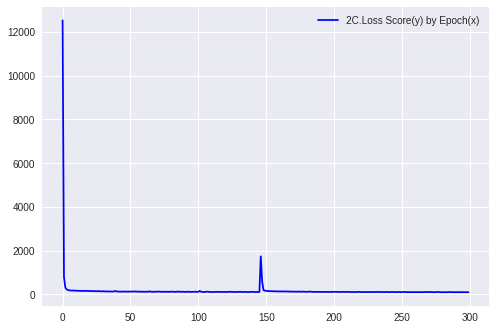

In [50]:
plt.plot(history_C.history['loss'], color='blue', label='2C.Loss Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

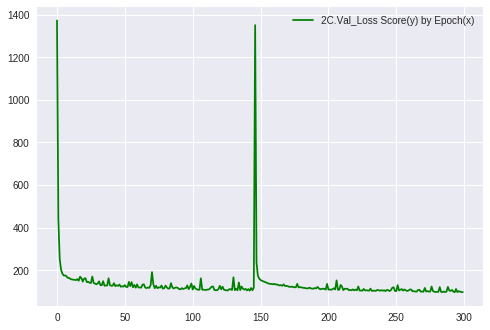

In [47]:
plt.plot(history_C.history['val_loss'], color='green', label='2C.Val_Loss Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

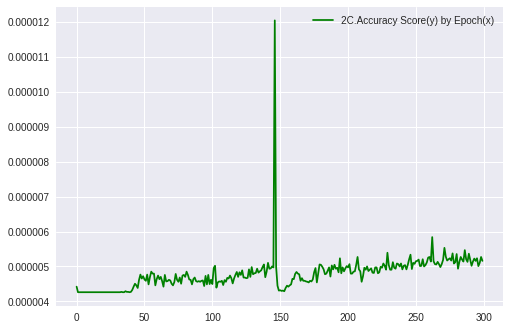

In [49]:
plt.plot(history_C.history['accuracy'],color='green', label='2C.Accuracy Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

In [32]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0155.jpg'))
# image_to_predict = np.array(Image.open('../Capstone_2/data/Sketches/Ruled/IMG_0119.jpg'))
# image_to_predict = image_to_predict.reshape(500,400,1)

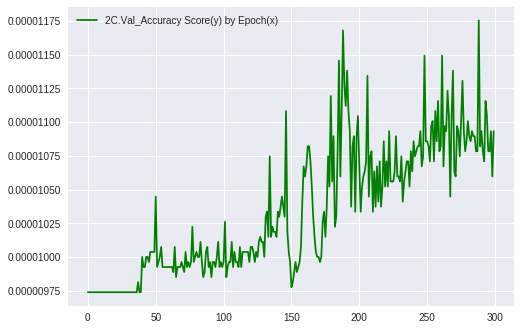

In [53]:
plt.plot(history_C.history['val_accuracy'],color='green', label='2C.Val_Accuracy Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

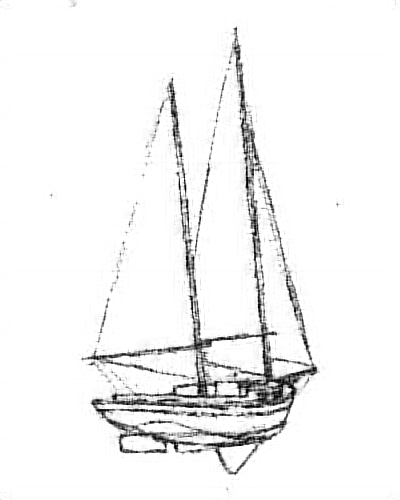

In [60]:
result = autoencoder_C.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [61]:
max(history_C.history['val_accuracy']), min(history_C.history['val_loss'])

(1.1753731087082997e-05, 96.75402069091797)

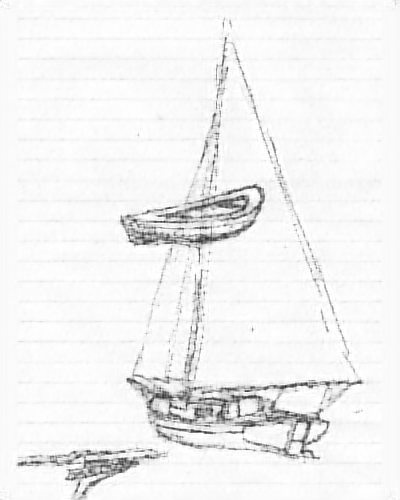

In [62]:
# See how it predicts on unseen images
result = autoencoder_C.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

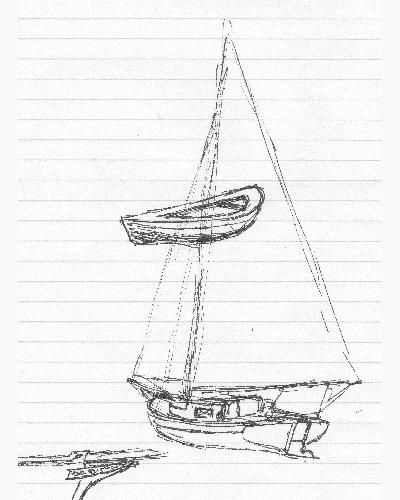

In [63]:
#original
Image.fromarray(image_to_predict)


# Model 2.D experimental
* change the end to sigmoid and linear (all combo) - worse
* added 2 more linear activations
* change optimizer
* add more dense layers


In [ ]:
#MODEL D. 
input_img = Input(shape=(500,400,1))

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='linear', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu')(x)


x = Dense(128,  activation='relu')(x)
# model.add(Dense(64,  activation='relu'))
x = Dense(2,    activation='linear', name="bottleneck")(x)
# model.add(Dense(64,  activation='relu'))
x = Dense(128,  activation='relu')(x)

# =====> prior dense layer
# # x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# # x = MaxPooling2D((2, 2), padding='same')(x)
# x = Dense(128)(x) #bottleneck
# # x = UpSampling2D((2, 2))(x)
# # x = Conv2DTranspose(8, (3, 3), activation='relu',  padding='same')(x)
# # x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='linear', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32,(3,3), activation='relu', padding='same')(x)

decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_D = Model(input_img, decoded)
autoencoder_D.summary()
autoencoder_D.compile(optimizer='adam', loss='mse', metrics=METRICS)

In [ ]:
history_D = autoencoder_D.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2 )

In [ ]:
plt.plot(history_D.history['loss'])

In [ ]:
plt.plot(history_D.history['ACCURACY'])

In [ ]:
# See how it predicts on unseen images
result = autoencoder_D.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

# Model 2.E Sparse +

In [69]:
#MODEL B. Bare bones *WORKS*BUT*SIMPLE


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (5, 5), activation='relu')(input_img)

x = Conv2D(8, (5, 5), activation='relu', padding='same')(x)

x = Dense(128)(x) 

x= Conv2DTranspose(32,(5,5), activation='relu')(x)

decoded = Conv2DTranspose(1, (5, 5), activation='linear', padding='same')(x)

autoencoder_E = Model(input_img, decoded)
autoencoder_E.summary()
autoencoder_E.compile(optimizer='adam', loss='mse', metrics='accuracy')


Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 496, 396, 32)      832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 496, 396, 8)       6408      
_________________________________________________________________
dense_8 (Dense)              (None, 496, 396, 128)     1152      
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 500, 400, 32)      102432    
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 500, 400, 1)       801       
Total params: 111,625
Trainable params: 111,625
Non-trainable params: 0
_______________________________________________

In [70]:
history_E = autoencoder_E.fit(x=X, y=y, batch_size=15, epochs = 300, verbose=1, callbacks=[tensorboard, model_cp], validation_split=0.2 )

Epoch 1/300
36/36 [==============================] - 8s 235ms/step - loss: 5573.2354 - accuracy: 4.2617e-06 - val_loss: 1132.5015 - val_accuracy: 9.7388e-06
Epoch 2/300
36/36 [==============================] - 7s 201ms/step - loss: 997.8774 - accuracy: 4.2617e-06 - val_loss: 1009.4010 - val_accuracy: 9.7388e-06
Epoch 3/300
36/36 [==============================] - 7s 201ms/step - loss: 840.0168 - accuracy: 4.2617e-06 - val_loss: 795.2415 - val_accuracy: 9.7388e-06
Epoch 4/300
36/36 [==============================] - 7s 202ms/step - loss: 643.5071 - accuracy: 4.3551e-06 - val_loss: 562.9068 - val_accuracy: 9.7761e-06
Epoch 5/300
36/36 [==============================] - 8s 209ms/step - loss: 514.2411 - accuracy: 4.2710e-06 - val_loss: 387.3505 - val_accuracy: 9.7761e-06
Epoch 6/300
36/36 [==============================] - 7s 205ms/step - loss: 319.2343 - accuracy: 4.2804e-06 - val_loss: 339.7934 - val_accuracy: 9.7388e-06
Epoch 7/300
36/36 [==============================] - 7s 205ms/step 

36/36 [==============================] - 6s 178ms/step - loss: 22.6305 - accuracy: 1.5262e-05 - val_loss: 20.9614 - val_accuracy: 4.0485e-05
Epoch 30/300
36/36 [==============================] - 7s 203ms/step - loss: 20.3605 - accuracy: 1.5645e-05 - val_loss: 28.2780 - val_accuracy: 2.9552e-05
Epoch 31/300
36/36 [==============================] - 6s 179ms/step - loss: 26.6504 - accuracy: 1.9150e-05 - val_loss: 30.0438 - val_accuracy: 3.7425e-05
Epoch 32/300
36/36 [==============================] - 6s 179ms/step - loss: 26.0555 - accuracy: 1.5150e-05 - val_loss: 22.3006 - val_accuracy: 4.0187e-05
Epoch 33/300
36/36 [==============================] - 6s 178ms/step - loss: 40.8010 - accuracy: 1.6178e-05 - val_loss: 44.4272 - val_accuracy: 2.8433e-05
Epoch 34/300
36/36 [==============================] - 6s 178ms/step - loss: 30.9524 - accuracy: 1.9617e-05 - val_loss: 24.5780 - val_accuracy: 5.2687e-05
Epoch 35/300
36/36 [==============================] - 6s 178ms/step - loss: 21.9978 - acc

36/36 [==============================] - 6s 176ms/step - loss: 335.3303 - accuracy: 4.2617e-06 - val_loss: 336.0315 - val_accuracy: 9.7388e-06
Epoch 78/300
36/36 [==============================] - 6s 176ms/step - loss: 315.6198 - accuracy: 4.3458e-06 - val_loss: 309.0407 - val_accuracy: 9.7388e-06
Epoch 79/300
36/36 [==============================] - 6s 176ms/step - loss: 284.6386 - accuracy: 4.7009e-06 - val_loss: 280.4568 - val_accuracy: 9.7388e-06
Epoch 80/300
36/36 [==============================] - 6s 176ms/step - loss: 261.6361 - accuracy: 4.6916e-06 - val_loss: 259.2475 - val_accuracy: 9.7388e-06
Epoch 81/300
36/36 [==============================] - 6s 176ms/step - loss: 240.5162 - accuracy: 4.5794e-06 - val_loss: 235.5328 - val_accuracy: 9.8134e-06
Epoch 82/300
36/36 [==============================] - 6s 176ms/step - loss: 219.1070 - accuracy: 5.0935e-06 - val_loss: 213.5212 - val_accuracy: 1.1455e-05
Epoch 83/300
36/36 [==============================] - 6s 177ms/step - loss: 2

36/36 [==============================] - 6s 177ms/step - loss: 146.7859 - accuracy: 1.0252e-05 - val_loss: 116.4643 - val_accuracy: 1.3358e-05
Epoch 130/300
36/36 [==============================] - 6s 176ms/step - loss: 106.2168 - accuracy: 5.7570e-06 - val_loss: 104.3544 - val_accuracy: 1.3433e-05
Epoch 131/300
36/36 [==============================] - 6s 177ms/step - loss: 100.1802 - accuracy: 5.8785e-06 - val_loss: 119.8135 - val_accuracy: 1.3358e-05
Epoch 132/300
36/36 [==============================] - 6s 176ms/step - loss: 130.8224 - accuracy: 5.5607e-06 - val_loss: 138.2437 - val_accuracy: 1.5858e-05
Epoch 133/300
36/36 [==============================] - 6s 177ms/step - loss: 124.3858 - accuracy: 7.2430e-06 - val_loss: 158.7902 - val_accuracy: 1.2388e-05
Epoch 134/300
36/36 [==============================] - 6s 176ms/step - loss: 135.3191 - accuracy: 6.2336e-06 - val_loss: 114.6796 - val_accuracy: 1.4590e-05
Epoch 135/300
36/36 [==============================] - 6s 177ms/step - l

Epoch 182/300
36/36 [==============================] - 6s 176ms/step - loss: 177.0992 - accuracy: 4.7664e-06 - val_loss: 177.4821 - val_accuracy: 9.9627e-06
Epoch 183/300
36/36 [==============================] - 6s 176ms/step - loss: 170.3291 - accuracy: 4.8879e-06 - val_loss: 169.2941 - val_accuracy: 1.0037e-05
Epoch 184/300
36/36 [==============================] - 6s 176ms/step - loss: 166.1628 - accuracy: 5.0093e-06 - val_loss: 164.5758 - val_accuracy: 1.0149e-05
Epoch 185/300
36/36 [==============================] - 6s 176ms/step - loss: 160.6597 - accuracy: 5.1215e-06 - val_loss: 162.1845 - val_accuracy: 1.0224e-05
Epoch 186/300
36/36 [==============================] - 6s 176ms/step - loss: 158.0092 - accuracy: 5.1308e-06 - val_loss: 159.8810 - val_accuracy: 1.0410e-05
Epoch 187/300
36/36 [==============================] - 6s 176ms/step - loss: 154.6620 - accuracy: 5.2150e-06 - val_loss: 157.3871 - val_accuracy: 1.0485e-05
Epoch 188/300
36/36 [==============================] - 6s 

36/36 [==============================] - 6s 176ms/step - loss: 63.7913 - accuracy: 1.1673e-05 - val_loss: 81.9129 - val_accuracy: 2.4254e-05
Epoch 235/300
36/36 [==============================] - 6s 177ms/step - loss: 95.5058 - accuracy: 1.0234e-05 - val_loss: 111.6521 - val_accuracy: 4.9627e-05
Epoch 236/300
36/36 [==============================] - 6s 176ms/step - loss: 65.9165 - accuracy: 1.4682e-05 - val_loss: 109.8752 - val_accuracy: 3.9403e-05
Epoch 237/300
36/36 [==============================] - 6s 177ms/step - loss: 55.2098 - accuracy: 1.1439e-05 - val_loss: 48.5460 - val_accuracy: 3.0224e-05
Epoch 238/300
36/36 [==============================] - 6s 176ms/step - loss: 42.3169 - accuracy: 1.1888e-05 - val_loss: 43.4304 - val_accuracy: 2.7201e-05
Epoch 239/300
36/36 [==============================] - 6s 177ms/step - loss: 41.4368 - accuracy: 1.1121e-05 - val_loss: 40.9514 - val_accuracy: 2.5709e-05
Epoch 240/300
36/36 [==============================] - 6s 176ms/step - loss: 40.39

Epoch 287/300
36/36 [==============================] - 6s 178ms/step - loss: 31.7658 - accuracy: 1.2056e-05 - val_loss: 24.2866 - val_accuracy: 2.6940e-05
Epoch 288/300
36/36 [==============================] - 6s 177ms/step - loss: 23.1201 - accuracy: 1.1280e-05 - val_loss: 23.3775 - val_accuracy: 3.2164e-05
Epoch 289/300
36/36 [==============================] - 6s 179ms/step - loss: 24.3266 - accuracy: 1.0888e-05 - val_loss: 24.6296 - val_accuracy: 2.3134e-05
Epoch 290/300
36/36 [==============================] - 6s 177ms/step - loss: 29.6425 - accuracy: 9.6075e-06 - val_loss: 24.7001 - val_accuracy: 3.2313e-05
Epoch 291/300
36/36 [==============================] - 6s 179ms/step - loss: 26.0184 - accuracy: 1.0636e-05 - val_loss: 29.1164 - val_accuracy: 4.2575e-05
Epoch 292/300
36/36 [==============================] - 6s 177ms/step - loss: 26.2002 - accuracy: 1.2860e-05 - val_loss: 31.7867 - val_accuracy: 2.9366e-05
Epoch 293/300
36/36 [==============================] - 6s 179ms/step -

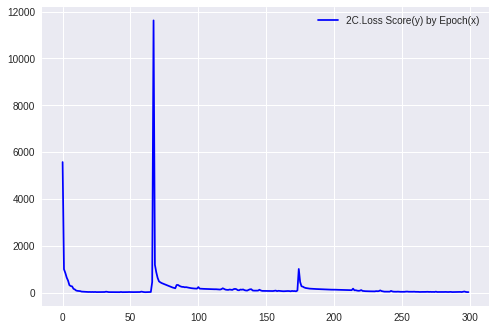

In [71]:
plt.plot(history_E.history['loss'], color='blue', label='2C.Loss Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

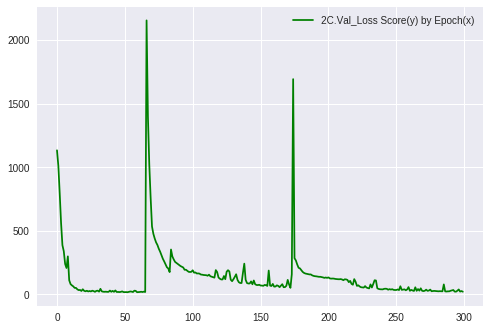

In [72]:
plt.plot(history_E.history['val_loss'], color='green', label='2C.Val_Loss Score(y) by Epoch(x)')
plt.legend()
plt.style.use('seaborn')

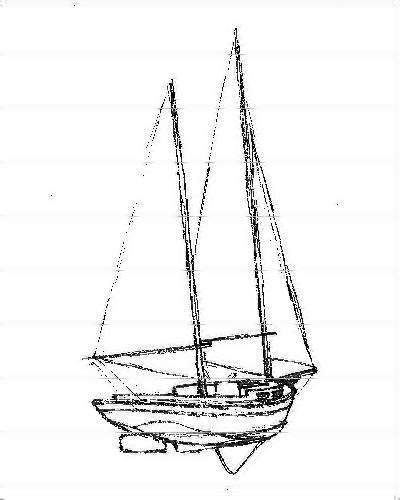

In [74]:
result = autoencoder_E.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

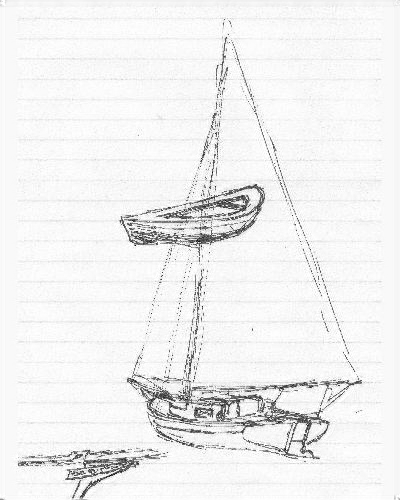

In [75]:
# See how it predicts on unseen images
result = autoencoder_E.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

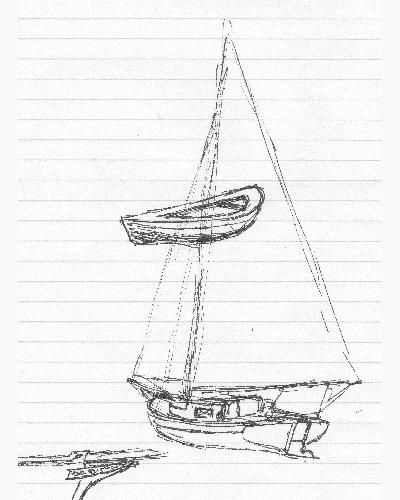

In [76]:
#original
Image.fromarray(image_to_predict)


In [ ]:
plt.imshow(X[2,:,:,:].reshape(500,400))

In [ ]:
plt.imshow(y[2,:,:,:].reshape(500,400))

In [ ]:
# result = model.predict(np.array([X]))
result = autoencoder.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
plt.imshow(image_to_predict.reshape(500,400))

In [ ]:
result = autoencoder_B.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
Image.fromarray(y[0].astype(np.uint8).reshape(500,400))

In [ ]:
Image.fromarray(X[0].astype(np.uint8).reshape(500,400))

In [ ]:
autoencoder.predict(X).min()

In [ ]:
autoencoder.predict(X).max()

In [ ]:
np.astype(auto)

# to run tensorboard

In [ ]:
!tensorboard --logdir=logs


In [ ]:
pip show tensorboard

In [ ]:
cd /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu/lib/python3.7/site-packages

In [ ]:
cd tensorboard

In [ ]:
python main.py --logdir=/path/to/log_file/

In [ ]:
# input_img = Input(shape=input_shape)
# x = Conv2D(256, 2, activation="swish", padding="same")(input_img)
# x = BatchNormalization()(x)
# x = Conv2D(128, 1, activation="swish", padding="same")(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="linear", padding="same")(x)
# x = BatchNormalization()(x)
# encoded = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# # x = UpSampling2D(2)(x)
# # x = Dropout(0.5)(x)
# x = Conv2D(128, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(256, 2, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# decoded = Conv2D(1, 1, activation="linear", padding='same')(x)
# autoencoder = Model(input_img, decoded)
# autoencoder.summary()

In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
